In [25]:
import numpy as np
import scipy
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import spsolve


# Problem 1

In [26]:
import numpy as np
N  = 100
xx = np.linspace(0,1,N)
yy = xx
dx = xx[1] - xx[0]
dy = dx
epsilon = dx
dt = .1

In [27]:
def create_1d_laplacian(n):
    """Creates a 1D Laplacian matrix of size n x n."""
    e = np.ones(n)
    diagonals = [-2 * e, e, e]
    laplacian_1d = diags(diagonals, [0, -1, 1], shape=(n, n))
    return laplacian_1d

def create_2d_laplacian(n,h):
    """Creates a sparse 2D Laplacian matrix using Kronecker product."""
    laplacian_1d = create_1d_laplacian(n)
    identity = eye(n)
    
    # Use Kronecker product to create the 2D Laplacian
    laplacian_2d = kron(laplacian_1d, identity) + kron(identity, laplacian_1d)
    return laplacian_2d/(h**2)

In [28]:
# np.random.seed(26)
U0 = np.random.random((N,N))
U0 = U0 - np.mean(U0)
lap = create_2d_laplacian(N,dx)
f_prime = lambda x: x**3 - x
u0_flat=U0.reshape(-1,1).flatten()

In [29]:
def forward_euler_step(u,lap,ft,t,step):
    F = ft(t)
    dudt = (lap @ u) + F
    return u + dudt*step

In [30]:
def backward_euler_step(u,lap,step):
    return   u+ step*spsolve(lap, u)



In [31]:
f = lambda u,dt : np.sign(u)*np.abs(u)*np.exp(dt)/(np.sqrt(1+u**2*(np.exp(2*dt)-1)))

In [32]:
def run_forward_method(u,f,lap,t0,tend,step):
    t = t0

    ls = list()
    ls.append(u)
    lst = list()
    lst.append(t)
    num_steps = int((tend-t0)//step)
    last_step = tend - num_steps*step - t0
    elap = epsilon**2*lap
    solve1 = -1/step*eye(len(u))+epsilon**2*lap
    for _ in range(num_steps):
        u_star = spsolve(solve1,-1*u/step)
        u = f(u_star,step)
        assert(np.mean(np.sign(u)==np.sign(u_star))==1)
        t+= step
        ls.append(u)
        lst.append(t)
        # print(u_star,u)
    

    u_star = spsolve(solve1,-1*u/step)
    u = f(u_star,step)
    ls.append(u)
    t+= last_step
    lst.append(t)
    return(ls,lst)

In [33]:
uu,tt = run_forward_method(u0_flat,f,lap,0,50,dt)

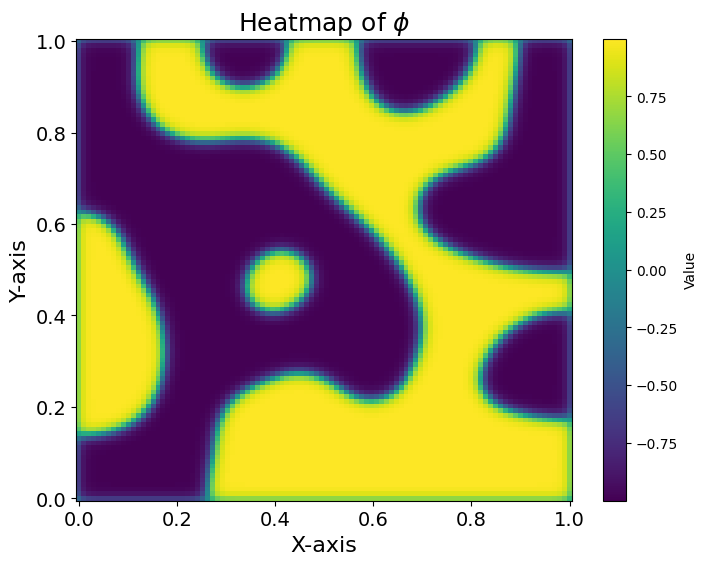

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
# x, y = 1D arrays for axis values
# U = 2D array with values
U = uu[-16].reshape(N,N)

plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, U, shading='auto', cmap='viridis')  # Shading 'auto' prevents visual artifacts
plt.colorbar(label='Value')  # Add a color bar to show value scale
plt.xlabel('X-axis',fontsize = 16)
plt.ylabel('Y-axis',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(r'Heatmap of $\phi$',fontsize = 18)
plt.show()


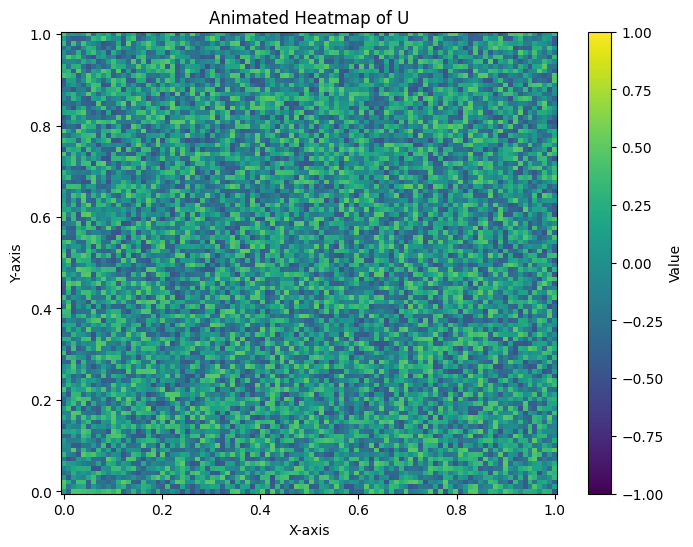

In [35]:
# Sample grid and initial data
import matplotlib.animation as animation

XX, YY = np.meshgrid(xx, yy)

# Generate random data for demonstration
# Replace this with your actual data generation or loading
astep = len(uu)//30
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.pcolormesh(XX.reshape(N,N), YY.reshape(N,N), uu[0].reshape(N,N), shading='auto', cmap='viridis', vmin = -1, vmax = 1)
fig.colorbar(cax, ax=ax, label='Value')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Animated Heatmap of U')

# Function to update the plot at each frame
def animate(i):
    cax.set_array(uu[i*astep].ravel())  # Update the array for the current frame

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=30, interval=100)  # Adjust interval for speed

# Save the animation as a video file (e.g., mp4) or display as a GIF
# ani.save('animated_heatmap.mp4', writer='ffmpeg', dpi=300)  # Save as MP4
# or display inline if using Jupyter Notebook
plt.show()
ani.save('animated_heatmap.gif', writer='pillow', dpi=80)


[3.180804257879237e-17, -4.68628708933222e-05, -8.354610168945623e-05, -0.00011442546902667351, -0.00014218502611953662, -0.0001684945940639924, -0.0001944614155059851, -0.00022089339644351064, -0.000248445643572007, -0.0002777017157512824, -0.0003092201058131448, -0.0003435626988661415, -0.0003813139873769244, -0.00042309544600224643, -0.00046957709408388846, -0.0005214869665062287, -0.0005796184796586321, -0.0006448352891084785, -0.0007180731164075555, -0.0008003381942863731, -0.0008927025121560706, -0.000996297013551708, -0.001112305326041958, -0.0012419623727694244, -0.001386563956900719, -0.0015474944360492414, -0.0017262789432783332, -0.0019246632818604003, -0.002144718141569716, -0.0023889552696015784, -0.0026604336905588733, -0.00296282704148967, -0.0033004215278035157, -0.0036780194553439802, -0.004100735090816077, -0.004573685184020981, -0.005101592597374647, -0.005688335512682497, -0.006336485267661987, -0.007046882583940229, -0.007818304340250812, -0.008647269872698106, -0.

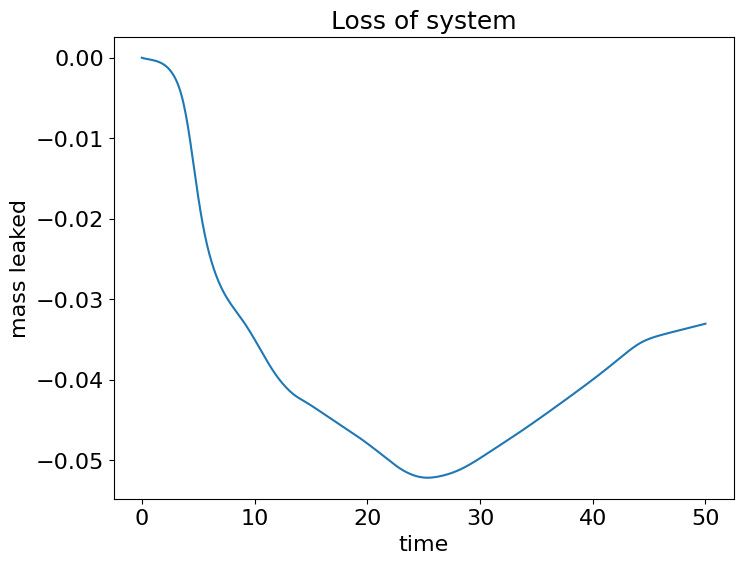

In [36]:
mass = [np.sum(uu[i])*dx*dy for i in range(len(uu))]
print(mass)
print(len(uu))
fig,ax = plt.subplots(figsize=(8, 6))
plt.plot(tt,mass)
ax.set_title('Loss of system',fontsize=18)
ax.set_xlabel('time',fontsize=16)
ax.set_ylabel('mass leaked',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

In [37]:
raise Exception()

Exception: 

# Problem 2

In [ ]:
import numpy as np
N  = 100
xx = np.linspace(0,1,N)
yy = xx
dx = xx[1] - xx[0]
dy = dx
epsilon = dx
dt = .01

In [ ]:
def create_1d_laplacian(n):
    """Creates a 1D Laplacian matrix of size n x n."""
    e = np.ones(n)
    diagonals = [-2 * e, e, e]
    laplacian_1d = diags(diagonals, [0, -1, 1], shape=(n, n))
    return laplacian_1d

def create_2d_laplacian(n,h):
    """Creates a sparse 2D Laplacian matrix using Kronecker product."""
    laplacian_1d = create_1d_laplacian(n)
    identity = eye(n)
    
    # Use Kronecker product to create the 2D Laplacian
    laplacian_2d = kron(laplacian_1d, identity) + kron(identity, laplacian_1d)
    return laplacian_2d/(h**2)

In [ ]:
np.random.seed(69420)
U0 = np.random.random((N,N))
U0 = U0 - np.mean(U0)
lap = create_2d_laplacian(N,dx)
f_prime = lambda x: x**3 - x
u0_flat=U0.reshape(-1,1).flatten()

In [ ]:
def forward_euler_step(u,lap,ft,t,step):
    F = ft(t)
    dudt = (lap @ u) + F
    return u + dudt*step

In [ ]:
def backward_euler_step(u,lap,step):
    return   u+ step*spsolve(lap, u)



In [ ]:
phi_star = lambda u,dt : np.sign(u)*np.abs(u)*np.exp(dt)/(np.sqrt(1+u**2*(np.exp(2*dt)-1)))
F = lambda phi : (phi**2-1)**2/4
F_prime = lambda phi: phi**3 - phi
beta = lambda phi_ss, phi_0 : sum(phi_0 - phi_ss)/sum(np.sqrt(F(phi_ss))) * 1/dt
phi_ss = lambda phi_ss, phi_0 : phi_ss + dt*beta(phi_ss,phi_0)*np.sqrt(F(phi_ss))

In [ ]:
def run_forward_method(u,f,lap,t0,tend,step):
    t = t0
    u0 = u
    ls = list()
    ls.append(u)
    lst = list()
    lst.append(t)
    num_steps = int((tend-t0)//step)
    last_step = tend - num_steps*step - t0
    solve1 = -1/step*eye(len(u))+epsilon**2*lap
    for _ in range(num_steps):
        u_star = spsolve(solve1,-1*u/step)
        u_ss = f(u_star,step)
        u = phi_ss(u_ss,u0)
        t+= step
        ls.append(u)
        lst.append(t)
        # print(u_star,u)
    

    u_star = spsolve(solve1,-1*u/step)
    u_ss = f(u_star,step)
    u = phi_ss(u_ss,u0)

    ls.append(u)
    t+= last_step
    lst.append(t)
    return(ls,lst)

In [ ]:
uu,tt = run_forward_method(u0_flat,f,lap,0,50,dt)

C:\Users\andyh\AppData\Local\Temp\ipykernel_5368\3993574408.py:10: UserWarning: shading value 'bilinear' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(xx, yy, U, shading='bilinear', cmap='viridis')  # Shading 'auto' prevents visual artifacts


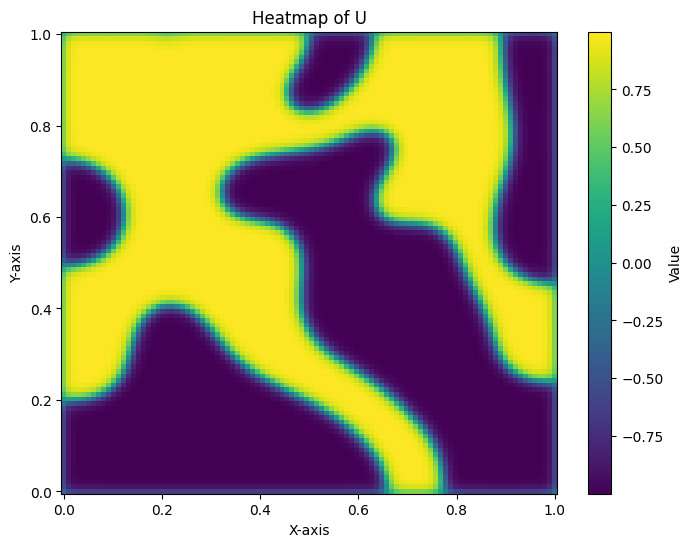

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
# x, y = 1D arrays for axis values
# U = 2D array with values
U = uu[-1].reshape(N,N)

plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, U, shading='bilinear', cmap='viridis')  # Shading 'auto' prevents visual artifacts
plt.colorbar(label='Value')  # Add a color bar to show value scale
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap of U')
plt.show()


In [ ]:
# Interpolate data to add more frames
num_original_frames = len(uu)
interpolation_factor = 1  # Number of extra frames between each original frame
num_frames = num_original_frames * interpolation_factor

uu_interp = []
for i in range(num_original_frames - 1):
    for t in np.linspace(0, 1, interpolation_factor, endpoint=False):
        U_interp = (1 - t) * uu[i] + t * uu[i + 1]
        uu_interp.append(U_interp)
uu_interp.append(uu[-1])  # Add the last frame

C:\Users\andyh\AppData\Local\Temp\ipykernel_5368\3674681304.py:11: UserWarning: shading value 'cubic' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  cax = ax.pcolormesh(XX.reshape(N,N), YY.reshape(N,N), uu_interp[0].reshape(N,N), shading='cubic', cmap='plasma', vmin = -1, vmax = 1)


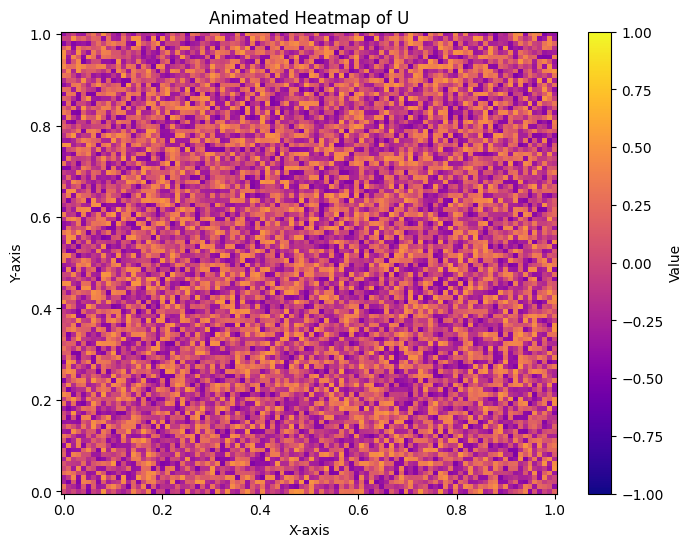

In [ ]:
# Sample grid and initial data
import matplotlib.animation as animation

XX, YY = np.meshgrid(xx, yy)

# Generate random data for demonstration
# Replace this with your actual data generation or loading
frames = 60
astep = len(uu_interp)//frames
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.pcolormesh(XX.reshape(N,N), YY.reshape(N,N), uu_interp[0].reshape(N,N), shading='cubic', cmap='plasma', vmin = -1, vmax = 1)
fig.colorbar(cax, ax=ax, label='Value')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Animated Heatmap of U')

# Function to update the plot at each frame
def animate(i):
    cax.set_array(uu_interp[i*astep].ravel())  # Update the array for the current frame

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=100)  # Adjust interval for speed

# Save the animation as a video file (e.g., mp4) or display as a GIF
# ani.save('animated_heatmap.mp4', writer='ffmpeg', dpi=300)  # Save as MP4
# or display inline if using Jupyter Notebook
plt.show()
ani.save('animated_heatmap.gif', writer='pillow', dpi=80)


[0.000e+00 1.000e-02 2.000e-02 ... 4.998e+01 4.999e+01 5.000e+01]
[4.784799567408083e-17, 4.784799567408083e-17, 4.7485510858368096e-17, 4.8572965305506294e-17, 4.8210480489793565e-17, 5.0022904568357226e-17, 4.8210480489793565e-17, 4.7485510858368096e-17, 4.7123026042655355e-17, 4.603557159551716e-17, 4.603557159551716e-17, 4.603557159551716e-17, 4.676054122694263e-17, 4.784799567408083e-17, 4.639805641122989e-17, 5.07478741997827e-17, 4.784799567408083e-17, 4.9297934936931763e-17, 4.784799567408083e-17, 4.966041975264449e-17, 5.07478741997827e-17, 4.639805641122989e-17, 4.784799567408083e-17, 4.7123026042655355e-17, 4.784799567408083e-17, 4.567308677980443e-17, 4.784799567408083e-17, 5.18353286469209e-17, 5.07478741997827e-17, 4.639805641122989e-17, 4.2410723438389824e-17, 4.567308677980443e-17, 5.83600553297501e-17, 4.8572965305506294e-17, 5.0022904568357226e-17, 4.893545012121903e-17, 5.219781346263363e-17, 4.204823862267709e-17, 4.096078417553889e-17, 5.111035901549543e-17, 3.9873

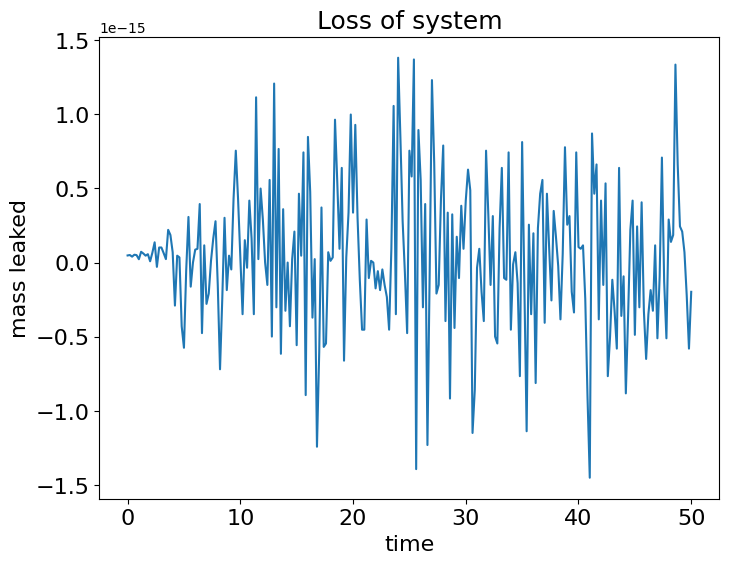

In [ ]:
mass = [np.sum(uu[i])*dx*dy for i in range(len(uu))]
pltmass = [mass[i] for i in range(len(mass) ) if i % 20 == 0]
pltt = [tt[i] for i in range(len(tt) )if i % 20 == 0]
tt = np.round(tt,4)
print(tt)
print(mass)
print(len(uu))
fig,ax = plt.subplots(figsize=(8, 6))
ax.plot(pltt,pltmass)
ax.set_title('Loss of system',fontsize=18)
ax.set_xlabel('time',fontsize=16)
ax.set_ylabel('mass leaked',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)